### Datenanalyse

Dieses Dokument dient zur Einarbeitung in den Datensatz. Ziel ist es ein Verständnis der einzelnen Attribute zu erlangen und ein Gefühl für deren Zusammenspiel zu gewinnen. Weiterhin sollen fehlerhafte Daten identifiziert werden.

**Vorbereitung: Import benötigter Bibliotheken & Einlesen der Daten**

In [18]:
from pathlib import Path
from scipy import stats

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

np.set_printoptions(suppress=True)

pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.max_colwidth = None

from IPython.display import display

In [ ]:
path1 = Path(r"A:\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")
path2 = Path(r"C:\Users\rober\Documents\Workspace\Python\Masterarbeit\Kaggle Home Credit Datensatz")

if path1.is_dir():
    DATASET_DIR = path1
else:
    DATASET_DIR = path2

In [ ]:
app_test = pd.read_csv(DATASET_DIR / "application_test.csv")
app_train = pd.read_csv(DATASET_DIR / "application_train.csv")
bureau = pd.read_csv(DATASET_DIR / "bureau.csv")
bureau_balance = pd.read_csv(DATASET_DIR / "bureau_balance.csv")
credit_card_balance = pd.read_csv(DATASET_DIR / "credit_card_balance.csv")
installments_payments = pd.read_csv(DATASET_DIR / "installments_payments.csv")
pcb = pd.read_csv(DATASET_DIR / "POS_CASH_balance.csv")
previous_application = pd.read_csv(DATASET_DIR / "previous_application.csv")

description = pd.read_csv(DATASET_DIR / "HomeCredit_columns_description.csv", encoding="latin", index_col=0)

**Beschreibungen der Attribute untergliedert nach den gegebenen CSV-Dateien**

In [ ]:
description.loc[description['Table']=="application_{train|test}.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="bureau.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="bureau_balance.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="POS_CASH_balance.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="credit_card_balance.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="previous_application.csv", "Row":"Special"]

In [ ]:
description.loc[description['Table']=="installments_payments.csv", "Row":"Special"]

**Anpassung der numerischen Kategorien**

In [ ]:
app_train["TARGET"].replace(
    {
        0: "Payback",
        1: "Default"
    }, inplace = True
)

## Untersuchung Application-Train & Application-Test

**Erstellung von Subklassen**

* payback = Kreditnehmer die ihren Kredit zurückzahlten
* default = Kreditnehmer die ihren Kredit nicht zurückzahlten
* n = nominale Daten
* m = metrische Daten
* md = diskrete metrische Daten
* mdp = diskrete metrische Daten der Kreditnehmer die ihren Kredit zurückzahlten
* mdd = diskrete metrische Daten der Kreditnehmer die ihren Kredit nicht zurückzahlten
* ms = stetige metrische Daten
* msp = stetige metrische Daten der Kreditnehmer die ihren Kredit zurückzahlten
* msd = stetige metrische Daten der Kreditnehmer die ihren Kredit nicht zurückzahlten


In [ ]:
n_heads = ['TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']
m_heads = ['CNT_CHILDREN','AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'HOUR_APPR_PROCESS_START', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'TOTALAREA_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']
md_heads = ['CNT_CHILDREN', "CNT_FAM_MEMBERS","HOUR_APPR_PROCESS_START", "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]
ms_heads = [head for head in m_heads if head not in md_heads]

In [ ]:
payback = app_train[app_train["TARGET"] == "Payback"]
default = app_train[app_train["TARGET"] == "Default"]
m = app_train[m_heads]
n = app_train[n_heads]

md = m[md_heads]
mdp = md[app_train["TARGET"] == "Payback"]
mdd = md[app_train["TARGET"] == "Default"]

ms = m[ms_heads]
msp = ms[app_train["TARGET"] == "Payback"]
msd = ms[app_train["TARGET"] == "Default"]

**Hilfsfunktion zum zeichnen eines Kreisdiagramms**

In [ ]:
# Function to draw a Piechart
def draw_piechart(arguments):
    
    fig, ax = plt.subplots(1,len(arguments))

    try:
    # Handle multiple plots
        for argument, a in zip(arguments,ax):
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]

            a.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False, labeldistance=1.05)
            a.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            a.set_title(title)
            
    # Handle single plot           
    except TypeError:
        for argument in arguments:
            labels = argument[0]
            sizes = argument[1]
            title = argument[2]
        
            ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, normalize=False)
            ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
            ax.set_title(title)
    plt.show()

## Untersuchung der Kreditnehmer - Payback vs. Default

**Verhältnis Payback zu Default im Datensatz**

In [ ]:
pb = len(payback.index)
df = len(default.index)
N = pb + df

labels = "Payback", "Default"
sizes = [pb/N,df/N]
title = "Payback vs Default"

arguments = [(labels, sizes, title)]

draw_piechart(arguments)

**Verhältnis Payback zu Default nach Geschlecht**

In [ ]:
F,M,other = payback["CODE_GENDER"].value_counts()
N = F+M+other

labels1 = "Female", "Male"
sizes1 = [F/N,M/N]
title1 = "Gender Payback"

F,M = default["CODE_GENDER"].value_counts()
X = default["CODE_GENDER"].value_counts()

N = F+M

labels2 = "Female", "Male"
sizes2 = [F/N,M/N]
title2 = "Gender Default"

arguments = [(labels1, sizes1, title1),(labels2, sizes2, title2)]

draw_piechart(arguments)

**Verhältnis Payback zu Default nach Bildung**

In [ ]:
count = payback["NAME_EDUCATION_TYPE"].value_counts()

low_sec = count["Lower secondary"]
sec = count["Secondary / secondary special"]
inc_high = count["Incomplete higher"]
high = count["Higher education"]
acad = count["Academic degree"]

N = len(payback["NAME_EDUCATION_TYPE"])

labels1 = "Secondary ", "Higher education", "Incomplete higher", "Lower secondary", "Academic degree"
sizes1 = [sec/N, high/N, inc_high/N, low_sec/N, acad/N]
title1 = "Education Payback"

count = default["NAME_EDUCATION_TYPE"].value_counts()

low_sec = count["Lower secondary"]
sec = count["Secondary / secondary special"]
inc_high = count["Incomplete higher"]
high = count["Higher education"]
acad = count["Academic degree"]

N = len(default["NAME_EDUCATION_TYPE"])

labels2 = "Secondary ", "Higher education", "Incomplete higher", "Lower secondary", "Academic degree"
sizes2 = [sec/N, high/N, inc_high/N, low_sec/N, acad/N]
title2 = "Education Default"


arguments = [(labels1, sizes1, title1),(labels2, sizes2, title2)]

draw_piechart(arguments)

**Verhältnis Payback zu Default - komplette Liste der kategorischen Variablen**

In [ ]:
for head in n.columns.values:
    
    df1 = payback[head].value_counts().rename_axis(head).reset_index(name='payback').head()
    df2 = default[head].value_counts().rename_axis(head).reset_index(name='default').head()
    
    df1["payback"] = df1["payback"]/df1["payback"].sum()*100
    df2["default"] = df2["default"]/df2["default"].sum()*100
    
    df = df1.merge(df2, how="outer", on=head)
    
    df["change"] = (df["default"]-df["payback"])
    
    df = df.sort_values("change", ascending=False)
    
    display(df)

In [ ]:
top10 = []

for head in n.columns.values:
    
    df1 = payback[head].value_counts().rename_axis(head).reset_index(name='payback').head()
    df2 = default[head].value_counts().rename_axis(head).reset_index(name='default').head()
    
    df1["payback"] = df1["payback"]/df1["payback"].sum()*100
    df2["default"] = df2["default"]/df2["default"].sum()*100
    
    df = df1.merge(df2, how="outer", on=head)
    
    df["change"] = (df["default"]-df["payback"])
    
    df = df.sort_values("change", ascending=False)
    
    for element in df["change"]:
        if np.isnan(element):
            continue
        if len(top10) < 10:
            t = (head, df[df["change"]==element][head].values[0], element)    
            top10.append(t)
        else:
            if element > top10[-1][-1]:
                top10.pop(-1)
                t = (head, df[df["change"]==element][head].values[0], element)
                top10.append(t)
            
        top10 = sorted(top10, key=lambda value: value[2], reverse=True)

df = pd.DataFrame(top10)
display(df)

**Pearson Correlation**

In [22]:
default.head()

SK_ID_CURR   TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002  Default         Cash loans           M            N   
26      100031  Default         Cash loans           F            N   
40      100047  Default         Cash loans           M            N   
42      100049  Default         Cash loans           F            N   
81      100096  Default         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y             0          202500.0    406597.5      24700.5   
26               Y             0          112500.0    979992.0      27076.5   
40               Y             0          202500.0   1193580.0      35028.0   
42               N             0          135000.0    288873.0      16258.5   
81               Y             0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0          351000.0   Unaccompanied               Working   
26         702000.0   Unaccompanied               Working   
40         855000.0   Unaccompanied  Commercial associate   
42         238500.0   Unaccompanied               Working   
81         252000.0   Unaccompanied             Pensioner   

              NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0   Secondary / secondary special  Single / not married  House / apartment   
26  Secondary / secondary special                 Widow  House / apartment   
40  Secondary / secondary special               Married  House / apartment   
42  Secondary / secondary special        Civil marriage  House / apartment   
81  Secondary / secondary special               Married  House / apartment   

    REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                     0.018801       -9461           -637            -3648.0   
26                    0.018029      -18724          -2628            -6573.0   
40                    0.025164      -17482          -1262            -1182.0   
42                    0.007305      -13384          -3597              -45.0   
81                    0.028663      -24794         365243            -5391.0   

    DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0             -2120          NaN           1               1                0   
26            -1827          NaN           1               1                0   
40            -1029          NaN           1               1                0   
42            -4409          NaN           1               1                1   
81            -4199          NaN           1               0                0   

    FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                  1           1           0        Laborers              1.0   
26                 1           0           0   Cooking staff              1.0   
40                 1           0           0        Laborers              2.0   
42                 1           1           0     Sales staff              2.0   
81                 1           0           0             NaN              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

   WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                   WEDNESDAY                       10   
26                     MONDAY                        9   
40                    TUESDAY                        9   
42                   THURSDAY                       11   
81                   THURSDAY                       10   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           

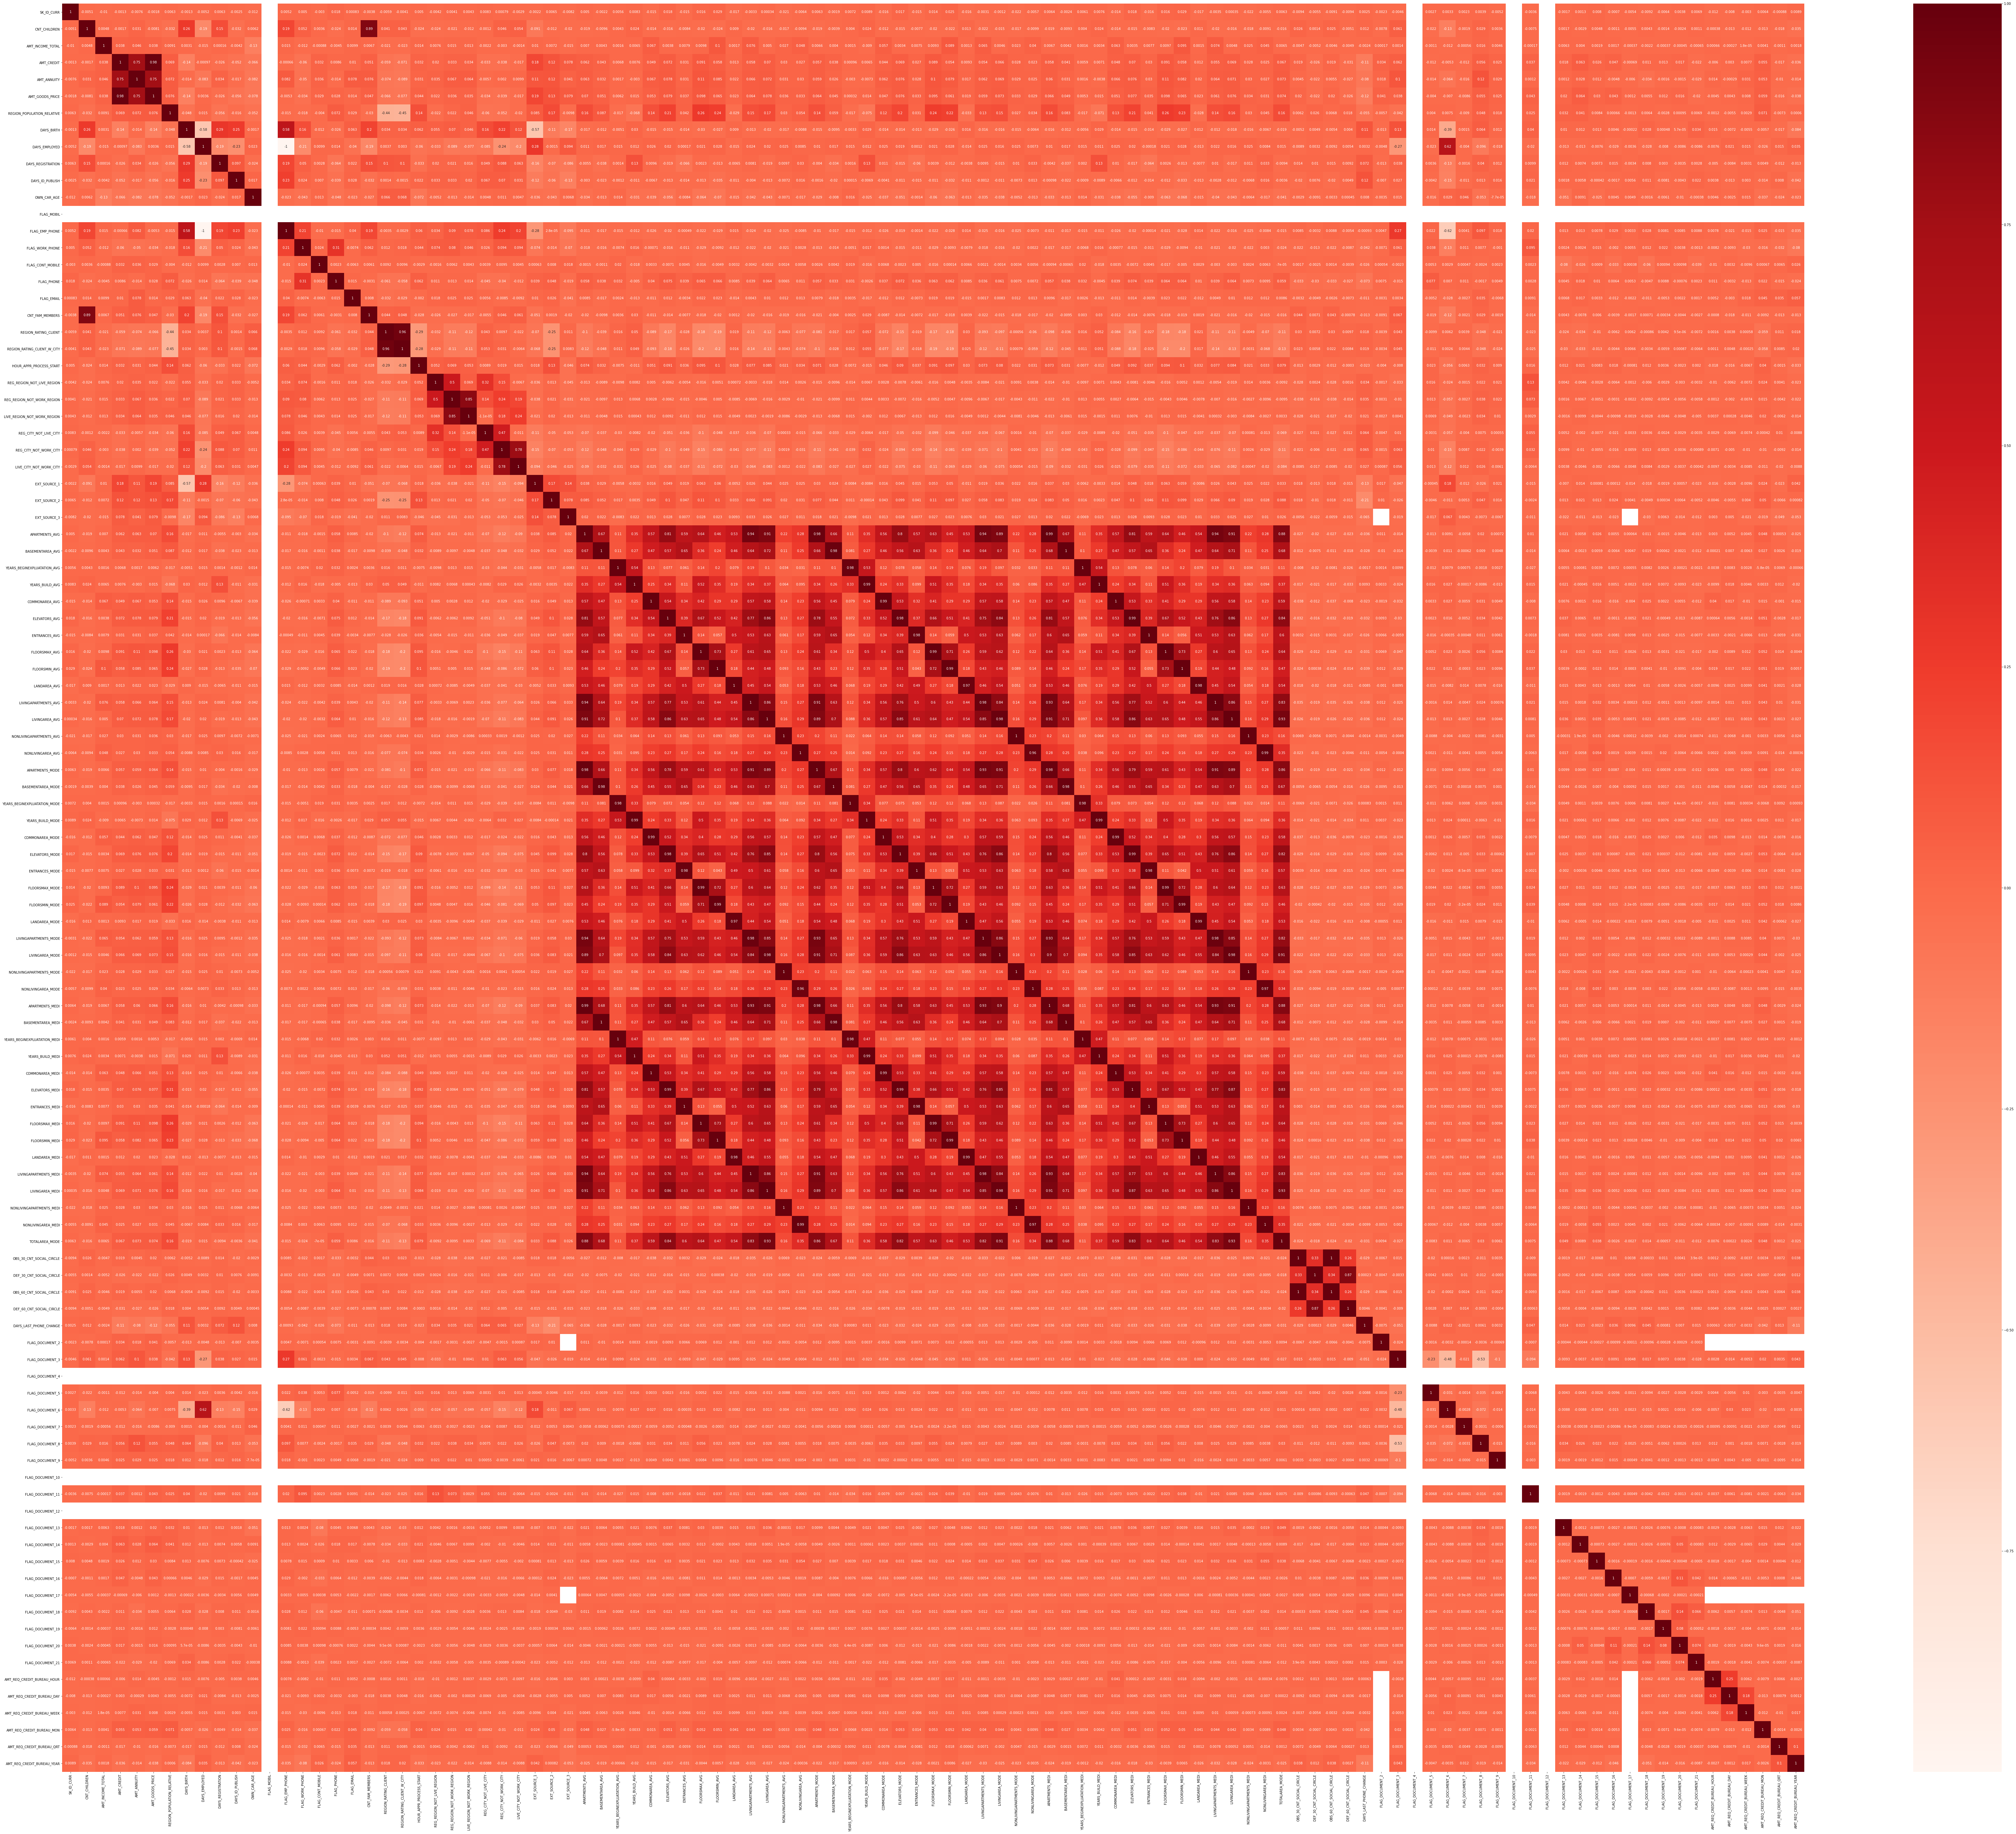

In [27]:
plt.figure(figsize=(120,100))
sns.heatmap(default.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

In [26]:
cor = default.corr()
cor[cor>0.5]

SK_ID_CURR  CNT_CHILDREN  AMT_INCOME_TOTAL  \
SK_ID_CURR                           1.0           NaN               NaN   
CNT_CHILDREN                         NaN      1.000000               NaN   
AMT_INCOME_TOTAL                     NaN           NaN               1.0   
AMT_CREDIT                           NaN           NaN               NaN   
AMT_ANNUITY                          NaN           NaN               NaN   
AMT_GOODS_PRICE                      NaN           NaN               NaN   
REGION_POPULATION_RELATIVE           NaN           NaN               NaN   
DAYS_BIRTH                           NaN           NaN               NaN   
DAYS_EMPLOYED                        NaN           NaN               NaN   
DAYS_REGISTRATION                    NaN           NaN               NaN   
DAYS_ID_PUBLISH                      NaN           NaN               NaN   
OWN_CAR_AGE                          NaN           NaN               NaN   
FLAG_MOBIL                           NaN           NaN               NaN   
FLAG_EMP_PHONE                       NaN           NaN               NaN   
FLAG_WORK_PHONE                      NaN           NaN               NaN   
FLAG_CONT_MOBILE                     NaN           NaN               NaN   
FLAG_PHONE                           NaN           NaN               NaN   
FLAG_EMAIL                           NaN           NaN               NaN   
CNT_FAM_MEMBERS                      NaN      0.885484               NaN   
REGION_RATING_CLIENT                 NaN           NaN               NaN   
REGION_RATING_CLIENT_W_CITY          NaN           NaN               NaN   
HOUR_APPR_PROCESS_START              NaN           NaN               NaN   
REG_REGION_NOT_LIVE_REGION           NaN           NaN               NaN   
REG_REGION_NOT_WORK_REGION           NaN           NaN               NaN   
LIVE_REGION_NOT_WORK_REGION          NaN           NaN               NaN   
REG_CITY_NOT_LIVE_CITY               NaN           NaN               NaN   
REG_CITY_NOT_WORK_CITY               NaN           NaN               NaN   
LIVE_CITY_NOT_WORK_CITY              NaN           NaN               NaN   
EXT_SOURCE_1                         NaN           NaN               NaN   
EXT_SOURCE_2                         NaN           NaN               NaN   
EXT_SOURCE_3                         NaN           NaN               NaN   
APARTMENTS_AVG                       NaN           NaN               NaN   
BASEMENTAREA_AVG                     NaN           NaN               NaN   
YEARS_BEGINEXPLUATATION_AVG          NaN           NaN               NaN   
YEARS_BUILD_AVG                      NaN           NaN               NaN   
COMMONAREA_AVG                       NaN           NaN               NaN   
ELEVATORS_AVG                        NaN           NaN               NaN   
ENTRANCES_AVG                        NaN           NaN               NaN   
FLOORSMAX_AVG                        NaN           NaN               NaN   
FLOORSMIN_AVG                        NaN           NaN               NaN   
LANDAREA_AVG                         NaN           NaN               NaN   
LIVINGAPARTMENTS_AVG                 NaN           NaN               NaN   
LIVINGAREA_AVG                       NaN           NaN               NaN   
NONLIVINGAPARTMENTS_AVG              NaN           NaN               NaN   
NONLIVINGAREA_AVG                    NaN           NaN               NaN   
APARTMENTS_MODE                      NaN           NaN               NaN   
BASEMENTAREA_MODE                    NaN           NaN               NaN   
YEARS_BEGINEXPLUATATION_MODE         NaN           NaN               NaN   
YEARS_BUILD_MODE                     NaN           NaN               NaN   
COMMONAREA_MODE                      NaN           NaN               NaN   
ELEVATORS_MODE                       NaN           NaN               NaN   
ENTRANCES_MODE                       NaN           NaN               NaN   
FL

**Numerische Werte**

In [ ]:
for head in ms.columns.values:
    plt.hist(ms[head])
    plt.hist(msp[head])
    plt.hist(msd[head])
    plt.legend(labels=["All", "Payback","Default"])
    plt.title(head)
    plt.show()

In [ ]:
for head in md.columns.values:
    bins = md[head].value_counts()
    bins1 = mdp[head].value_counts()
    bins2 = mdd[head].value_counts()

    fig, ax = plt.subplots()
    ax.bar(bins.keys(), bins.values, label='All')
    ax.bar(bins1.keys(), bins1.values, label='Payback')
    ax.bar(bins2.keys(), bins2.values, label='Default')
    
    plt.xticks(np.arange(len(bins.keys())), bins.keys())
    
    plt.title(head)
    plt.legend()
    plt.show()

Vergleich zweier Verteilungen

In [ ]:
# Sehr zeitintensiver Code; TODO: Workaround #
head = "DAYS_EMPLOYED"

x = ms[head]/365*-1
a = msp[head]/365*-1
b = msd[head]/365*-1

a = stats.gaussian_kde(a)
a = a(np.arange(min(x),max(x)))
b = stats.gaussian_kde(b)
b = b(np.arange(min(x),max(x)))

x = np.minimum(a,b)
y = np.maximum(a,b)

ix = x.sum()
iy = y.sum()

t = (head, 1-ix/iy)
t

In [ ]:
# sehr zeitintensiver code; TODO: workaround #
top10 = []

skip = ["AMT_ANNUITY"]
days = ["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "DAYS_LAST_PHONE_CHANGE"]


for head in ms.columns.values:
    
    if head in skip:
        continue
    
    x = ms[head]
    a = msp[head]
    b = msd[head]
    
    if head in days:
        x = x/365*-1
        a = a/365*-1
        b = b/365*-1
    
    a = stats.gaussian_kde(a)
    a = a(np.arange(min(x),max(x)))
    b = stats.gaussian_kde(b)
    b = b(np.arange(min(x),max(x)))

    x = np.minimum(a,b)
    y = np.maximum(a,b)

    ix = x.sum()
    iy = y.sum()

    t = (head, 1-ix/iy)
    print(t)
    
    top10.append(t)

df = pd.DataFrame(top10)